# ISO Spectra

There are ISO spectra in the Galactic center.   Let's plot them.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
resp = requests.get('https://irsa.ipac.caltech.edu/workspace/TMP_ttHAMi_24908/Atlas/17h_45m_37.22s_-28d_56m_10.2s_Equ_J2000_26633.v0001/sws_pws_spsc.tbl.html')
resp.raise_for_status()
soup = BeautifulSoup(resp.text)
fitsfiles = [x.attrs['href'] for x in soup.findAll('a') if x.attrs['href'].endswith('fit')]

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
for fn in fitsfiles:
    basefn = os.path.basename(fn)
    if not os.path.exists(f'{basepath}/{basefn}'):
        resp = requests.get(fn)
        resp.raise_for_status()
        with open(f'{basepath}/{basefn}', 'wb') as fh:
            fh.write(resp.content)

In [5]:
import pyspeckit

In [6]:
from astropy.io import fits
from astropy import units as u

In [7]:
def read_iso(fn):
    fh = fits.open(fn)
    wl = fh[0].data[:,0] * u.um
    flux = fh[0].data[:,1] * u.Jy
    return pyspeckit.Spectrum(xarr=wl, data=flux, header=fh[0].header)

(0.0, 8.0)

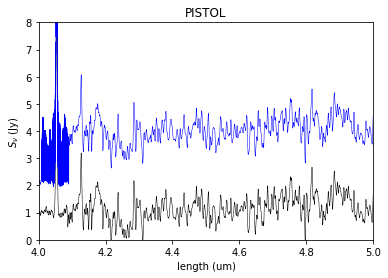

In [8]:
sps = read_iso(f'{basepath}/84101302_sws.fit')
spp = read_iso(f'{basepath}/84101302_pws.fit')
sps.plotter(xmin=4, xmax=5.0)
spp.plotter(xmin=4, xmax=5.0, axis=sps.plotter.axis, color='b', clear=False)
spp.plotter.axis.set_ylim(0, 8)

(0.0, 12.0)

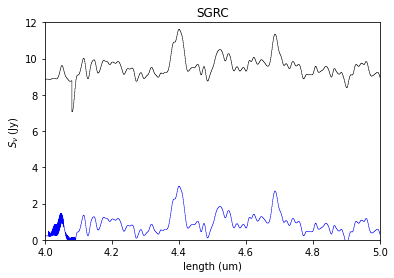

In [9]:
sps = read_iso(f'{basepath}/84100301_sws.fit')
spp = read_iso(f'{basepath}/84100301_pws.fit')
sps.plotter(xmin=4, xmax=5.0)
spp.plotter(xmin=4, xmax=5.0, axis=sps.plotter.axis, color='b', clear=False)
spp.plotter.axis.set_ylim(0, 12)

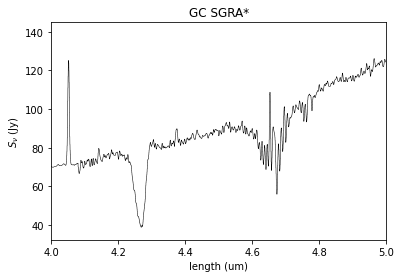

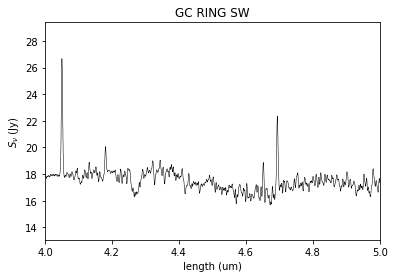

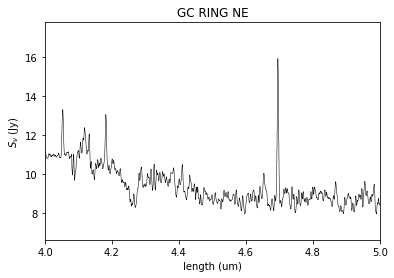

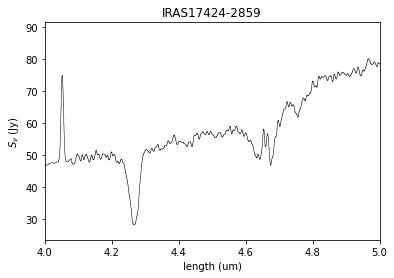

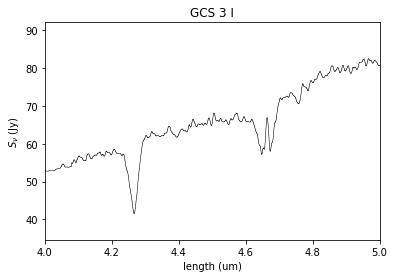

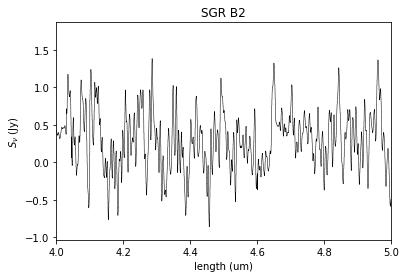

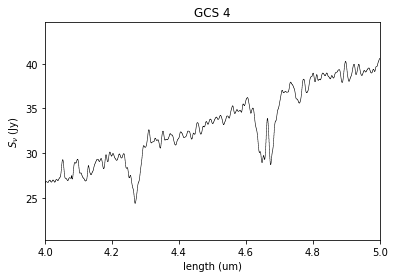

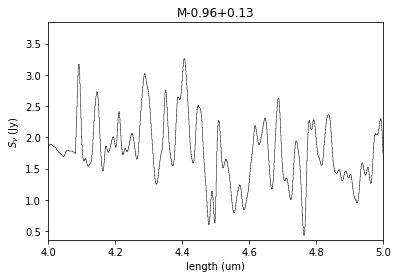

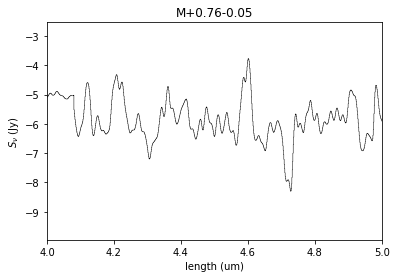

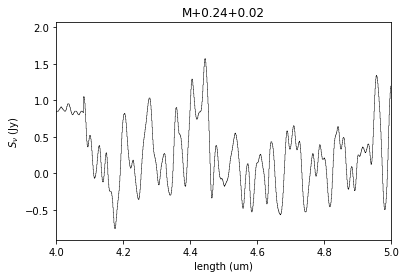

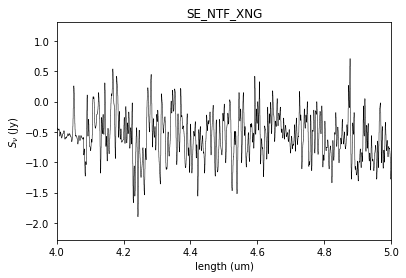

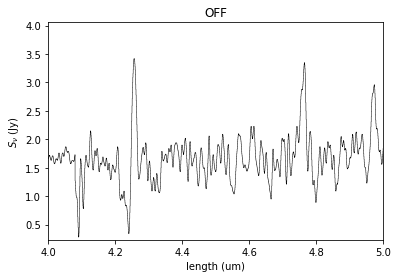

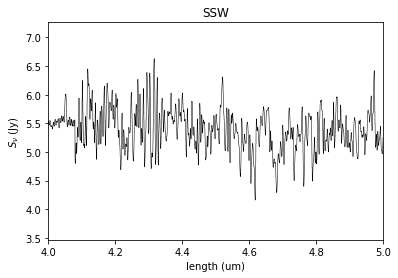

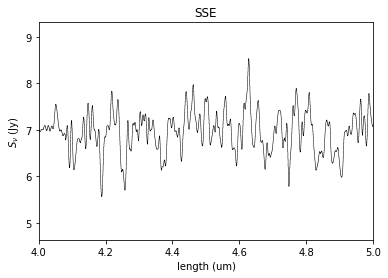

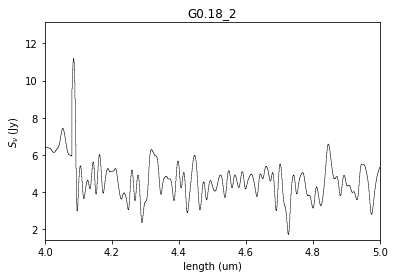

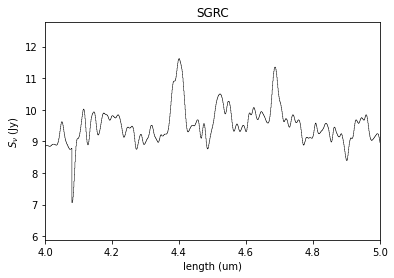

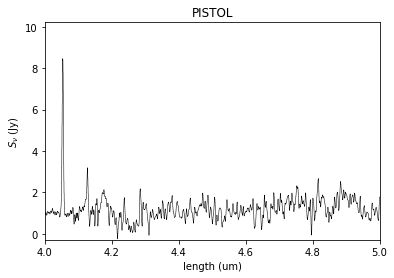

In [10]:
for fn in fitsfiles:
    basefn = os.path.basename(fn)
    if 'sws' in basefn:
        sp = read_iso(f'{basepath}/{basefn}')
        sp.plotter(xmin=4, xmax=5)

In [11]:
import pylab as pl
from astropy.coordinates import SkyCoord

In [12]:
import adjustText

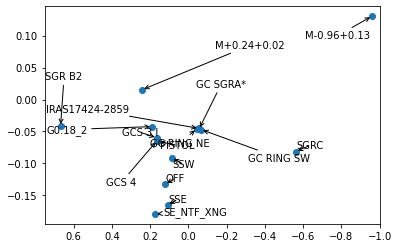

In [13]:
pl.figure()
coords = []
labels = []
for fn in fitsfiles:
    basefn = os.path.basename(fn)
    if 'sws' in basefn:
        sp = read_iso(f'{basepath}/{basefn}')
        coord = SkyCoord(sp.header['ATTRA'], sp.header['ATTDEC'], unit=(u.deg, u.deg), frame='fk5')
        coords.append(coord)
        labels.append(sp.header['OBJECT'])
        #pl.plot(coord.galactic.l.wrap_at(180*u.deg).deg, coord.galactic.b.deg, 'o')
        pl.annotate(sp.header['OBJECT'], (coord.galactic.l.wrap_at(180*u.deg).deg, coord.galactic.b.deg), arrowprops={'arrowstyle': '->', 'connectionstyle':'arc3'})
xs, ys = [coord.galactic.l.wrap_at(180*u.deg).deg for coord in coords], [coord.galactic.b.deg for coord in coords]
pl.plot(xs, ys, 'o')
pl.draw()
pl.gca().set_xlim(0.75, -1)
adjustText.adjust_text(pl.gca().texts, x=xs, y=ys, lim=5000);

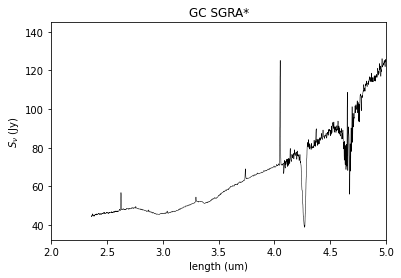

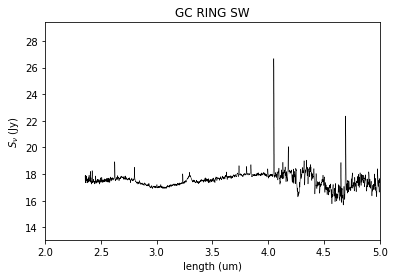

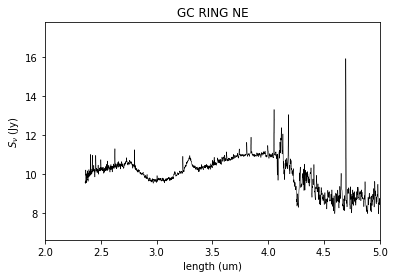

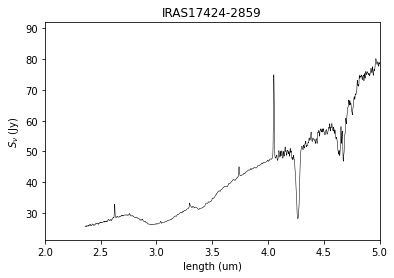

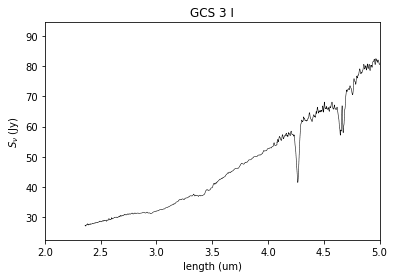

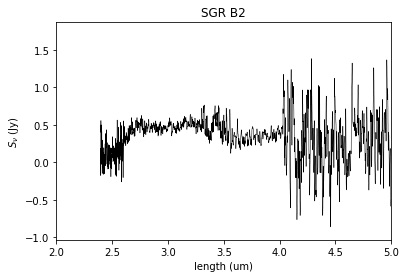

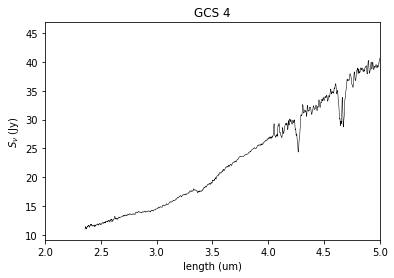

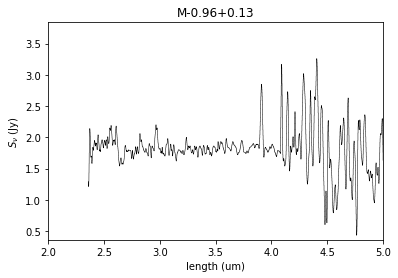

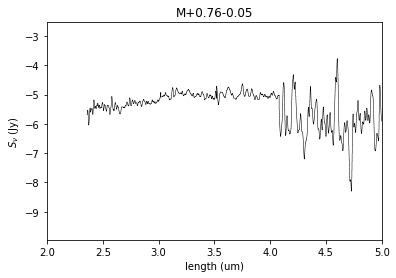

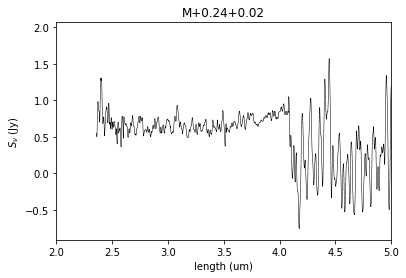

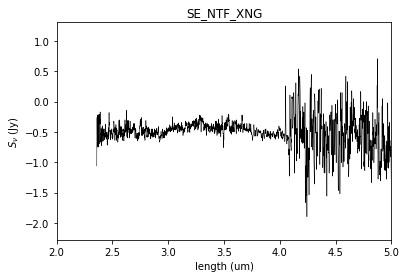

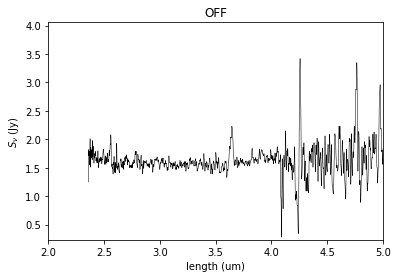

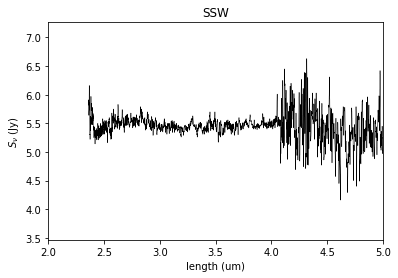

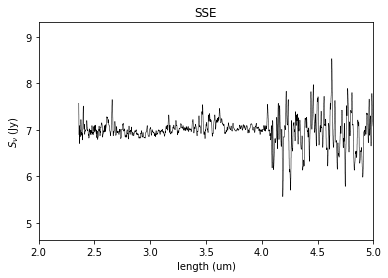

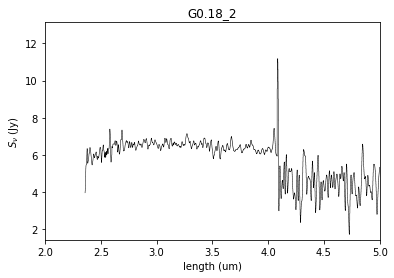

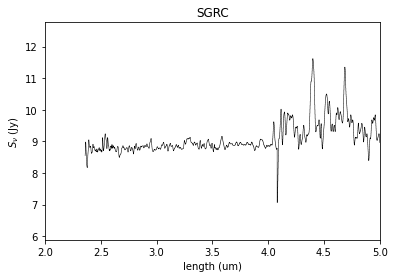

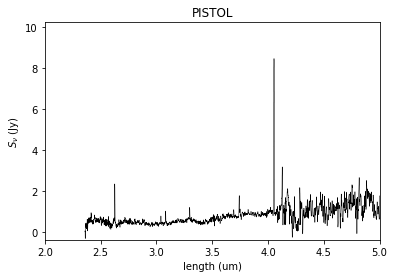

In [14]:
for fn in fitsfiles:
    basefn = os.path.basename(fn)
    if 'sws' in basefn:
        sp = read_iso(f'{basepath}/{basefn}')
        sp.plotter(xmin=2, xmax=5)

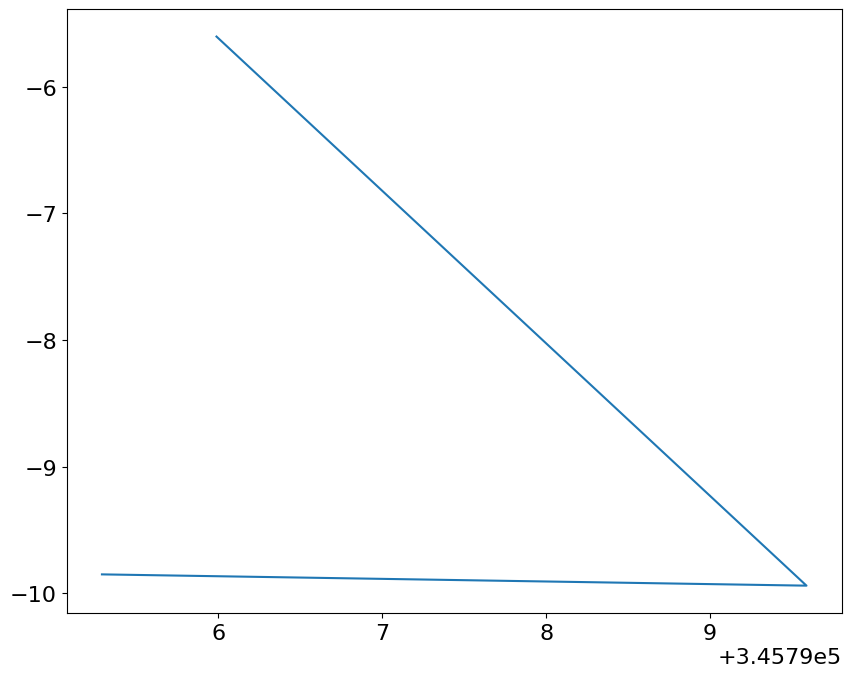

In [85]:
pl.plot(freqs, aij)